In [2]:
!sudo apt-get update
!sudo apt-get install -y build-essential swig python3-dev python3-pip

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [858 kB]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:12 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,998 kB]
Get:13 http://archive.ubuntu.com/ubuntu

In [3]:
!pip install rarfile --quiet
!pip install stable-baselines3 > /dev/null
!pip install box2d-py > /dev/null
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!sudo apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1

In [4]:
# install dependencies
!pip3 install gym --upgrade
!pip3 install pyglet
!pip3 install Box2D
!pip3 install box2d-py
!pip3 install gym[Box_2D]
!pip3 install gym[box2d]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.7/721.7 kB 14.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gym: filename=gym-0.26.2-py3-none-any.whl size=827624 sha256=eab34a7b8b195ddac7de7c394fd6ddd1ae401742faeead30ffa4c9af710ed522
  Stored in directory: /root/.cache/pip/wheels/b9/22/6d/3e7b32d98451b4cd9d12417052affbeeeea012955d437da1da
Successfully built gym
  Attempting uninstall: gym
    Found existing installation: gym 0.25.2
    Uninstalling gym-0.25.2:
      Successfully uninstalled gym-0.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.0.9 requires gym<=0.25.2, but you have gym 0.26.2 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 884.3/884.3 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import torch

# if gpu is to be used
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

The input state of the Lunar Lander consists of following components:

  1. Horizontal Position
  2. Vertical Position
  3. Horizontal Velocity
  4. Vertical Velocity
  5. Angle
  6. Angular Velocity
  7. Left Leg Contact
  8. Right Leg Contact

The actions of the agents are:
  1. Do Nothing
  2. Fire Main Engine
  3. Fire Left Engine
  4. Fire Right Engine

In [6]:
!sudo apt-get update
!sudo apt-get install xvfb


Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings
  xfon

# DQN

In [7]:
from gym.wrappers import RecordVideo
import gym
import io
import os
import glob
import torch
from IPython.display import HTML
from IPython import display as ipythondisplay
from pyvirtualdisplay import Display
import random
import base64
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from collections import namedtuple, deque
import torch.nn as nn
import torch.nn.functional as F
from stable_baselines3 import DQN
from stable_baselines3.common.results_plotter import ts2xy, load_results
from stable_baselines3.common.callbacks import EvalCallback

In [47]:
# enviroment
import gym
env = gym.make('LunarLander-v2')
#TODO: find observation size: 8
state_size = env.observation_space.shape[0]
#TODO: find action size: 4: 0- Do nothing 1- Fire left engine 2- Fire down engine 3- Fire right engine
action_size = env.action_space.n
state_size, action_size

(8, 4)

In [8]:
# Set up virtual display
display = Display(visible=0, size=(1400, 900))
display.start()

"""
Utility functions to enable video recording of gym environment
and displaying it.
To enable video, just do "env = wrap_env(env)""
"""


# Utility function to enable video recording of gym environment and displaying it
def show_video():
    mp4list = glob.glob('video/*.mp4')
    if len(mp4list) > 0:
        mp4 = mp4list[0]
        video = io.open(mp4, 'r+b').read()
        encoded = base64.b64encode(video)
        ipythondisplay.display(HTML(data='''<video alt="test" autoplay loop controls style="height: 400px;">
                    <source src="data:video/mp4;base64,{0}" type="video/mp4" />
                 </video>'''.format(encoded.decode('ascii'))))
    else:
        print("Could not find video")

In [9]:
# experience replay
import random
from collections import namedtuple, deque

Transition = namedtuple('Transition', ('state', 'action', 'next_state', 'reward', 'done'))

class ExperienceReplay():
    def __init__(self, capacity):
        self.memory = deque([], maxlen=capacity)

    def store_trans(self, s, a, sp, r, done):
      # TODO: store new transition in memory
        transition = Transition(s, a, sp, r, done)
        self.memory.append(transition)

    def sample(self, batch_size):
      # TODO: take RANDOM sample from memory
        return random.sample(self.memory, batch_size)

    def __len__(self):
        return len(self.memory)

In [11]:
# DQN
import torch.nn as nn
import torch.nn.functional as F

# Deep Q-Network
class DeepQNetwork(nn.Module):
    def __init__(self, state_size, action_size):
        super(DeepQNetwork, self).__init__()
        # TODO: define the architecture
        # NOTE: input=observation/state, output=action
        self.net = nn.Sequential(
            nn.Linear(state_size, 512),
            nn.ReLU(),
            nn.LayerNorm(512),
            nn.Dropout(0.1),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.LayerNorm(512),
            nn.Dropout(0.1),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, action_size)
        )

    def forward(self, x):
        # TODO: forward propagation
        # NOTE: use ReLu for activation function in all layers
        # NOTE: last layer has no activation function (predict action)
        # ReLU is created in init, no need here
        return self.net(x)

In [12]:
# DQN Agent
class DQNAgent():
   # NOTE: DON'T change initial values
    def __init__(self, state_size, action_size, batch_size, gamma=0.99, buffer_size=25000, alpha=1e-4):
        # network parameter
        self.state_size = state_size
        self.action_size = action_size

        self.batch_size = batch_size
        self.gamma = gamma

        self.experience_replay = ExperienceReplay(buffer_size)

        self.value_net = DeepQNetwork(state_size, action_size).to(device)
        # optimizer
        # TODO: create adam for optimizing network's parameter (learning rate=alpha)

        self.optimizer = optim.Adam(self.value_net.parameters(), lr=alpha)

    def take_action(self, state, eps=0.0):
        # TODO: take action using e-greedy policy
        # NOTE: takes action using the greedy policy with a probability of 1−𝜖 and a random action with a probability of 𝜖
        # NOTE:
        self.value_net.eval()
        if random.random() > eps:
            with torch.no_grad():
                return torch.argmax(self.value_net(torch.tensor(state).float().unsqueeze(0).to(device))).item()
        else:
            return np.random.randint(0, self.action_size)

    def update_params(self):
        if len(self.experience_replay) < self.batch_size:
            return
        batch = Transition(*zip(*self.experience_replay.sample(self.batch_size)))

        state_batch = torch.tensor(np.array(batch.state), dtype=torch.float32).to(device)
        action_batch = torch.tensor(batch.action, dtype=torch.int64).unsqueeze(1).to(device)
        next_state_batch = torch.tensor(np.array(batch.next_state), dtype=torch.float32).to(device)
        reward_batch = torch.tensor(batch.reward, dtype=torch.float32).unsqueeze(1).to(device)
        done_batch = torch.tensor(batch.done, dtype=torch.float32).unsqueeze(1).to(device)

        q_expected = self.value_net(state_batch).gather(1, action_batch)
        # TODO: compute the expected Q values [y]
        # STEP2
        # TODO: compute Q values [Q(s_t, a)]
        q_targets_next = self.value_net(next_state_batch).detach().max(1)[0].unsqueeze(1)
        q_targets = reward_batch + (self.gamma * q_targets_next * (1 - done_batch))
        # STEP3
        # TODO: compute mse loss
        loss = F.mse_loss(q_expected, q_targets)
        # TODO: optimize the model
        # NOTE: DON'T forget to set the gradients to zeros
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

    def save(self, fname):
        # TODO: save checkpoint
        torch.save(self.value_net.state_dict(), fname)

    def load(self, fname):
        self.value_net.load_state_dict(torch.load(fname, map_location=device))

In [26]:
# Main training loop
env = gym.make('LunarLander-v2', render_mode="rgb_array")
state_size = env.observation_space.shape[0]
action_size = env.action_space.n
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

n_episodes = 250
eps = 1.0
eps_decay_rate = 0.97
eps_end = 0.01
BATCH_SIZE = 32

Episode 25	Average Reward: -99.13	Epsilon: 0.47
Episode 49	Average Reward: -72.98	Epsilon: 0.22Moviepy - Building video /content/DQN/batch32/eps50/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch32/eps50/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch32/eps50/rl-video-episode-0.mp4
Episode 50	Average Reward: -77.28	Epsilon: 0.22
Episode 75	Average Reward: 81.39	Epsilon: 0.10
Episode 99	Average Reward: 57.38	Epsilon: 0.05Moviepy - Building video /content/DQN/batch32/eps100/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch32/eps100/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch32/eps100/rl-video-episode-0.mp4
Episode 100	Average Reward: 60.18	Epsilon: 0.05
Episode 125	Average Reward: 122.11	Epsilon: 0.02
Episode 149	Average Reward: 140.58	Epsilon: 0.01Moviepy - Building video /content/DQN/batch32/eps150/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch32/eps150/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch32/eps150/rl-video-episode-0.mp4
Episode 150	Average Reward: 131.81	Epsilon: 0.01
Episode 175	Average Reward: 106.59	Epsilon: 0.01
Episode 199	Average Reward: -209.97	Epsilon: 0.01Moviepy - Building video /content/DQN/batch32/eps200/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch32/eps200/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch32/eps200/rl-video-episode-0.mp4
Episode 200	Average Reward: -215.48	Epsilon: 0.01
Episode 225	Average Reward: -276.08	Epsilon: 0.01
Episode 249	Average Reward: -494.25	Epsilon: 0.01Moviepy - Building video /content/DQN/batch32/eps250/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch32/eps250/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch32/eps250/rl-video-episode-0.mp4
Episode 250	Average Reward: -512.11	Epsilon: 0.01


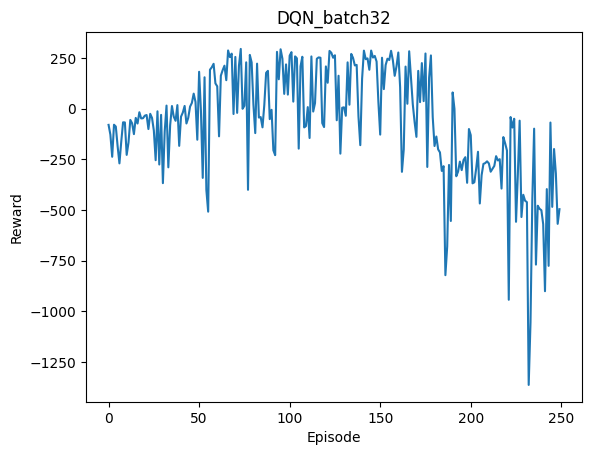

0

In [27]:
# training phase

# TODO: create agent

agent = DQNAgent(state_size, action_size, batch_size=BATCH_SIZE)

crs = np.zeros(n_episodes)
crs_recent = deque(maxlen=25)


# training loop
for i_episode in range(1, n_episodes+1):
    env = RecordVideo(gym.make("LunarLander-v2", render_mode="rgb_array"), f"./DQN/batch{BATCH_SIZE}/eps{i_episode}") if i_episode % 50 == 0 else gym.make("LunarLander-v2", render_mode="rgb_array")
    state, info = env.reset()
    done = False
    cr = 0
    while not done:
        # TODO: select and perform an action
        action = agent.take_action(state, eps)
        next_state, reward, done, truncated, info = env.step(action)
        # TODO: store transition in experience replay
        agent.experience_replay.store_trans(state, action, next_state, reward, done or truncated)
        agent.update_params()
        state = next_state
        cr += reward

    eps = max(eps * eps_decay_rate, eps_end)
    crs[i_episode - 1] = cr
    crs_recent.append(cr)
    if i_episode % 50 == 0:
        agent.save(f"q_net_batch{BATCH_SIZE}_eps{i_episode}.pt")

    print(f'\rEpisode {i_episode}\tAverage Reward: {np.mean(crs_recent):.2f}\tEpsilon: {eps:.2f}', end="")
    if i_episode % 25 == 0:
        print(f'\rEpisode {i_episode}\tAverage Reward: {np.mean(crs_recent):.2f}\tEpsilon: {eps:.2f}')

fig = plt.figure()
plt.plot(np.arange(len(crs)), crs)
plt.ylabel('Reward')
plt.xlabel('Episode')
plt.title(f"DQN_batch{BATCH_SIZE}")
plt.savefig(f"DQN_batch{BATCH_SIZE}.pdf")
plt.show()
os.system("zip -r DQN.zip DQN/")


In [28]:
!zip -r /content/batch32 /content/DQN/batch32

  adding: content/DQN/batch32/ (stored 0%)
  adding: content/DQN/batch32/eps250/ (stored 0%)
  adding: content/DQN/batch32/eps250/rl-video-episode-0.meta.json (deflated 13%)
  adding: content/DQN/batch32/eps250/rl-video-episode-0.mp4 (deflated 21%)
  adding: content/DQN/batch32/eps150/ (stored 0%)
  adding: content/DQN/batch32/eps150/rl-video-episode-0.meta.json (deflated 13%)
  adding: content/DQN/batch32/eps150/rl-video-episode-0.mp4 (deflated 9%)
  adding: content/DQN/batch32/eps200/ (stored 0%)
  adding: content/DQN/batch32/eps200/rl-video-episode-0.meta.json (deflated 13%)
  adding: content/DQN/batch32/eps200/rl-video-episode-0.mp4 (deflated 10%)
  adding: content/DQN/batch32/eps50/ (stored 0%)
  adding: content/DQN/batch32/eps50/rl-video-episode-0.meta.json (deflated 13%)
  adding: content/DQN/batch32/eps50/rl-video-episode-0.mp4 (deflated 7%)
  adding: content/DQN/batch32/eps100/ (stored 0%)
  adding: content/DQN/batch32/eps100/rl-video-episode-0.meta.json (deflated 13%)
  addin

Episode 25	Average Reward: -109.25	Epsilon: 0.47
Episode 49	Average Reward: -54.91	Epsilon: 0.22Moviepy - Building video /content/DQN/batch64/eps50/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch64/eps50/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch64/eps50/rl-video-episode-0.mp4
Episode 50	Average Reward: -40.80	Epsilon: 0.22


/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episode 75	Average Reward: -42.99	Epsilon: 0.10
Episode 99	Average Reward: -167.25	Epsilon: 0.05Moviepy - Building video /content/DQN/batch64/eps100/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch64/eps100/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch64/eps100/rl-video-episode-0.mp4
Episode 100	Average Reward: -161.85	Epsilon: 0.05
Episode 125	Average Reward: -119.41	Epsilon: 0.02
Episode 149	Average Reward: -243.92	Epsilon: 0.01Moviepy - Building video /content/DQN/batch64/eps150/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch64/eps150/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch64/eps150/rl-video-episode-0.mp4
Episode 150	Average Reward: -220.91	Epsilon: 0.01
Episode 175	Average Reward: -212.84	Epsilon: 0.01
Episode 199	Average Reward: -308.89	Epsilon: 0.01Moviepy - Building video /content/DQN/batch64/eps200/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch64/eps200/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch64/eps200/rl-video-episode-0.mp4
Episode 200	Average Reward: -306.41	Epsilon: 0.01
Episode 225	Average Reward: -363.63	Epsilon: 0.01
Episode 249	Average Reward: -256.00	Epsilon: 0.01Moviepy - Building video /content/DQN/batch64/eps250/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch64/eps250/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch64/eps250/rl-video-episode-0.mp4
Episode 250	Average Reward: -250.99	Epsilon: 0.01


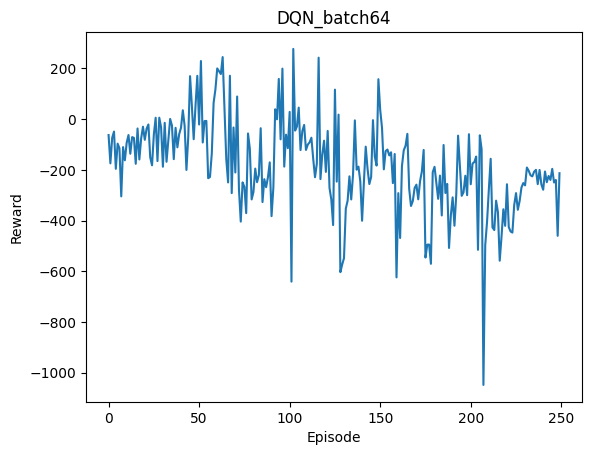

0

In [15]:
# Training for batch size 64
env = gym.make('LunarLander-v2', render_mode="rgb_array")
state_size = env.observation_space.shape[0]
action_size = env.action_space.n
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

n_episodes = 250
eps = 1.0
eps_decay_rate = 0.97
eps_end = 0.01
BATCH_SIZE = 64

agent = DQNAgent(state_size, action_size, batch_size=BATCH_SIZE)
crs = np.zeros(n_episodes)
crs_recent = deque(maxlen=25)

for i_episode in range(1, n_episodes+1):
    env = RecordVideo(gym.make("LunarLander-v2", render_mode="rgb_array"), f"./DQN/batch{BATCH_SIZE}/eps{i_episode}") if i_episode % 50 == 0 else gym.make("LunarLander-v2", render_mode="rgb_array")
    state, info = env.reset()
    done = False
    cr = 0
    while not done:
        action = agent.take_action(state, eps)
        next_state, reward, done, truncated, info = env.step(action)
        agent.experience_replay.store_trans(state, action, next_state, reward, done or truncated)
        agent.update_params()
        state = next_state
        cr += reward

    eps = max(eps * eps_decay_rate, eps_end)
    crs[i_episode - 1] = cr
    crs_recent.append(cr)
    if i_episode % 50 == 0:
        agent.save(f"q_net_batch{BATCH_SIZE}_eps{i_episode}.pt")

    print(f'\rEpisode {i_episode}\tAverage Reward: {np.mean(crs_recent):.2f}\tEpsilon: {eps:.2f}', end="")
    if i_episode % 25 == 0:
        print(f'\rEpisode {i_episode}\tAverage Reward: {np.mean(crs_recent):.2f}\tEpsilon: {eps:.2f}')

fig = plt.figure()
plt.plot(np.arange(len(crs)), crs)
plt.ylabel('Reward')
plt.xlabel('Episode')
plt.title(f"DQN_batch{BATCH_SIZE}")
plt.savefig(f"DQN_batch{BATCH_SIZE}.pdf")
plt.show()
os.system("zip -r DQN64.zip DQN/")


In [20]:
!zip -r /content/batch64 /content/DQN/batch64

  adding: content/DQN/batch64/ (stored 0%)
  adding: content/DQN/batch64/eps250/ (stored 0%)
  adding: content/DQN/batch64/eps250/rl-video-episode-0.meta.json (deflated 13%)
  adding: content/DQN/batch64/eps250/rl-video-episode-0.mp4 (deflated 9%)
  adding: content/DQN/batch64/eps150/ (stored 0%)
  adding: content/DQN/batch64/eps150/rl-video-episode-0.meta.json (deflated 13%)
  adding: content/DQN/batch64/eps150/rl-video-episode-0.mp4 (deflated 11%)
  adding: content/DQN/batch64/eps200/ (stored 0%)
  adding: content/DQN/batch64/eps200/rl-video-episode-0.meta.json (deflated 13%)
  adding: content/DQN/batch64/eps200/rl-video-episode-0.mp4 (deflated 9%)
  adding: content/DQN/batch64/eps50/ (stored 0%)
  adding: content/DQN/batch64/eps50/rl-video-episode-0.meta.json (deflated 13%)
  adding: content/DQN/batch64/eps50/rl-video-episode-0.mp4 (deflated 11%)
  adding: content/DQN/batch64/eps100/ (stored 0%)
  adding: content/DQN/batch64/eps100/rl-video-episode-0.meta.json (deflated 13%)
  addin

/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episode 25	Average Reward: -127.15	Epsilon: 0.47
Episode 49	Average Reward: -107.56	Epsilon: 0.22Moviepy - Building video /content/DQN/batch128/eps50/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch128/eps50/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch128/eps50/rl-video-episode-0.mp4
Episode 50	Average Reward: -98.44	Epsilon: 0.22
Episode 75	Average Reward: -10.82	Epsilon: 0.10
Episode 99	Average Reward: -81.85	Epsilon: 0.05Moviepy - Building video /content/DQN/batch128/eps100/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch128/eps100/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch128/eps100/rl-video-episode-0.mp4
Episode 100	Average Reward: -83.47	Epsilon: 0.05
Episode 125	Average Reward: -228.49	Epsilon: 0.02
Episode 149	Average Reward: -272.75	Epsilon: 0.01Moviepy - Building video /content/DQN/batch128/eps150/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch128/eps150/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch128/eps150/rl-video-episode-0.mp4
Episode 150	Average Reward: -266.42	Epsilon: 0.01
Episode 175	Average Reward: -137.99	Epsilon: 0.01
Episode 199	Average Reward: -365.07	Epsilon: 0.01Moviepy - Building video /content/DQN/batch128/eps200/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch128/eps200/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch128/eps200/rl-video-episode-0.mp4
Episode 200	Average Reward: -356.72	Epsilon: 0.01
Episode 225	Average Reward: -230.63	Epsilon: 0.01
Episode 249	Average Reward: -172.22	Epsilon: 0.01Moviepy - Building video /content/DQN/batch128/eps250/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DQN/batch128/eps250/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DQN/batch128/eps250/rl-video-episode-0.mp4
Episode 250	Average Reward: -184.37	Epsilon: 0.01


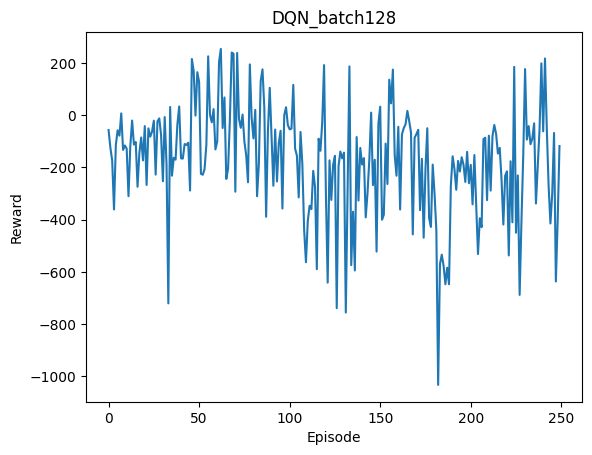

0

In [21]:
# Training for batch size 128
env = gym.make('LunarLander-v2', render_mode="rgb_array")
state_size = env.observation_space.shape[0]
action_size = env.action_space.n
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

n_episodes = 250
eps = 1.0
eps_decay_rate = 0.97
eps_end = 0.01
BATCH_SIZE = 128

agent = DQNAgent(state_size, action_size, batch_size=BATCH_SIZE)
crs = np.zeros(n_episodes)
crs_recent = deque(maxlen=25)

for i_episode in range(1, n_episodes+1):
    env = RecordVideo(gym.make("LunarLander-v2", render_mode="rgb_array"), f"./DQN/batch{BATCH_SIZE}/eps{i_episode}") if i_episode % 50 == 0 else gym.make("LunarLander-v2", render_mode="rgb_array")
    state, info = env.reset()
    done = False
    cr = 0
    while not done:
        action = agent.take_action(state, eps)
        next_state, reward, done, truncated, info = env.step(action)
        agent.experience_replay.store_trans(state, action, next_state, reward, done or truncated)
        agent.update_params()
        state = next_state
        cr += reward

    eps = max(eps * eps_decay_rate, eps_end)
    crs[i_episode - 1] = cr
    crs_recent.append(cr)
    if i_episode % 50 == 0:
        agent.save(f"q_net_batch{BATCH_SIZE}_eps{i_episode}.pt")

    print(f'\rEpisode {i_episode}\tAverage Reward: {np.mean(crs_recent):.2f}\tEpsilon: {eps:.2f}', end="")
    if i_episode % 25 == 0:
        print(f'\rEpisode {i_episode}\tAverage Reward: {np.mean(crs_recent):.2f}\tEpsilon: {eps:.2f}')

fig = plt.figure()
plt.plot(np.arange(len(crs)), crs)
plt.ylabel('Reward')
plt.xlabel('Episode')
plt.title(f"DQN_batch{BATCH_SIZE}")
plt.savefig(f"DQN_batch{BATCH_SIZE}.pdf")
plt.show()
os.system("zip -r DQN64.zip DQN/")


In [22]:
!zip -r /content/batch128 /content/DQN/batch128

  adding: content/DQN/batch128/ (stored 0%)
  adding: content/DQN/batch128/eps250/ (stored 0%)
  adding: content/DQN/batch128/eps250/rl-video-episode-0.meta.json (deflated 13%)
  adding: content/DQN/batch128/eps250/rl-video-episode-0.mp4 (deflated 9%)
  adding: content/DQN/batch128/eps150/ (stored 0%)
  adding: content/DQN/batch128/eps150/rl-video-episode-0.meta.json (deflated 13%)
  adding: content/DQN/batch128/eps150/rl-video-episode-0.mp4 (deflated 11%)
  adding: content/DQN/batch128/eps200/ (stored 0%)
  adding: content/DQN/batch128/eps200/rl-video-episode-0.meta.json (deflated 13%)
  adding: content/DQN/batch128/eps200/rl-video-episode-0.mp4 (deflated 9%)
  adding: content/DQN/batch128/eps50/ (stored 0%)
  adding: content/DQN/batch128/eps50/rl-video-episode-0.meta.json (deflated 13%)
  adding: content/DQN/batch128/eps50/rl-video-episode-0.mp4 (deflated 10%)
  adding: content/DQN/batch128/eps100/ (stored 0%)
  adding: content/DQN/batch128/eps100/rl-video-episode-0.meta.json (deflat

In [30]:
!zip -r /content/batch128 /content

Scanning files .................


zip error: Interrupted (aborting)


# DDQN

In [29]:
import gym
import io
import os
import glob
import torch
import base64
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3 import DQN
from stable_baselines3.common.results_plotter import ts2xy, load_results
from stable_baselines3.common.callbacks import EvalCallback
from gym.wrappers import RecordVideo
from IPython.display import HTML
from IPython import display as ipythondisplay
from pyvirtualdisplay import Display
import random
from collections import namedtuple, deque
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [34]:
# DDQN Agent class
class DDQNAgent():
    def __init__(self, state_size, action_size, batch_size, gamma=0.99, buffer_size=25000, alpha=1e-4):
        self.state_size = state_size
        self.action_size = action_size

        # hyperparameters
        self.batch_size = batch_size
        self.gamma = gamma
        self.experience_buffer = ExperienceReplay(buffer_size)

        self.value_net = DeepQNetwork(state_size, action_size).to(device)
        self.target_value_net = DeepQNetwork(state_size, action_size).to(device)
        self.update_target_network()

         # optimizer
        # TODO: create adam for optimizing network's parameter (learning rate=alpha)
        # NOTE: target network parameters DOSEN'T update with optimizer
        self.optimizer = optim.Adam(self.value_net.parameters(), lr=alpha)

    def take_action(self, state, eps=0.0):
        self.value_net.eval()
        if random.random() > eps:
            with torch.no_grad():
                return torch.argmax(self.value_net(torch.tensor(state).float().unsqueeze(0).to(device))).item()
        else:
            return np.random.randint(0, self.action_size)

    def update_params(self):
        if len(self.experience_buffer) < self.batch_size:
            return
        batch = Transition(*zip(*self.experience_buffer.sample(self.batch_size)))

        state_batch = torch.tensor(np.array(batch.state), dtype=torch.float32).to(device)
        action_batch = torch.tensor(batch.action, dtype=torch.int64).unsqueeze(1).to(device)
        next_state_batch = torch.tensor(np.array(batch.next_state), dtype=torch.float32).to(device)
        reward_batch = torch.tensor(batch.reward, dtype=torch.float32).unsqueeze(1).to(device)
        done_batch = torch.tensor(batch.done, dtype=torch.float32).unsqueeze(1).to(device)

        q_targets_next = self.target_value_net(next_state_batch).detach().max(1)[0].unsqueeze(1)
        q_targets = reward_batch + (self.gamma * q_targets_next * (1 - done_batch))
        q_expected = self.value_net(state_batch).gather(1, action_batch)
        loss = F.mse_loss(q_expected, q_targets)


        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

    def update_target_network(self):
        self.target_value_net.load_state_dict(self.value_net.state_dict())

    def save(self, fname):
        torch.save(self.value_net.state_dict(), fname)

    def load(self, fname):
        self.value_net.load_state_dict(torch.load(fname, map_location=device))

In [40]:
env = gym.make('LunarLander-v2', render_mode="rgb_array")
state_size = env.observation_space.shape[0]
action_size = env.action_space.n
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

n_episodes = 250
eps = 1.0
eps_decay_rate = 0.97
eps_end = 0.01
BATCH_SIZE = 64

Episode 25	Average Reward: -108.72	Epsilon: 0.47
Episode 49	Average Reward: -49.28	Epsilon: 0.22Moviepy - Building video /content/DDQN/batch64/eps50/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DDQN/batch64/eps50/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DDQN/batch64/eps50/rl-video-episode-0.mp4
Episode 50	Average Reward: -44.42	Epsilon: 0.22
Episode 75	Average Reward: 12.53	Epsilon: 0.10
Episode 99	Average Reward: 15.58	Epsilon: 0.05Moviepy - Building video /content/DDQN/batch64/eps100/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DDQN/batch64/eps100/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DDQN/batch64/eps100/rl-video-episode-0.mp4
Episode 100	Average Reward: 21.32	Epsilon: 0.05
Episode 125	Average Reward: -38.43	Epsilon: 0.02
Episode 149	Average Reward: -94.50	Epsilon: 0.01Moviepy - Building video /content/DDQN/batch64/eps150/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DDQN/batch64/eps150/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DDQN/batch64/eps150/rl-video-episode-0.mp4
Episode 150	Average Reward: -98.30	Epsilon: 0.01
Episode 175	Average Reward: -227.02	Epsilon: 0.01
Episode 199	Average Reward: -89.44	Epsilon: 0.01Moviepy - Building video /content/DDQN/batch64/eps200/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DDQN/batch64/eps200/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DDQN/batch64/eps200/rl-video-episode-0.mp4
Episode 200	Average Reward: -79.91	Epsilon: 0.01
Episode 225	Average Reward: -54.41	Epsilon: 0.01
Episode 249	Average Reward: -48.46	Epsilon: 0.01Moviepy - Building video /content/DDQN/batch64/eps250/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DDQN/batch64/eps250/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DDQN/batch64/eps250/rl-video-episode-0.mp4
Episode 250	Average Reward: -34.15	Epsilon: 0.01


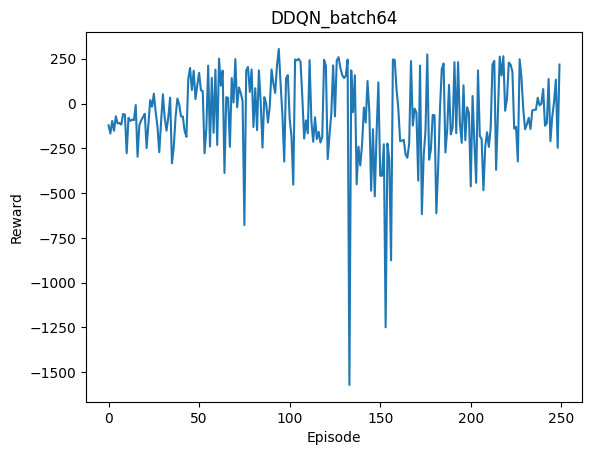

0

In [41]:
agent = DDQNAgent(state_size, action_size, batch_size=BATCH_SIZE)
crs = np.zeros(n_episodes)
crs_recent = deque(maxlen=25)

for i_episode in range(1, n_episodes+1):
    env = RecordVideo(gym.make("LunarLander-v2", render_mode="rgb_array"), f"./DDQN/batch{BATCH_SIZE}/eps{i_episode}") if i_episode % 50 == 0 else gym.make("LunarLander-v2", render_mode="rgb_array")
    state, info = env.reset()
    done = False
    cr = 0
    action_count = 0
    while not done:
        action = agent.take_action(state, eps)
        next_state, reward, done, truncated, info = env.step(action)
        agent.experience_buffer.store_trans(state, action, next_state, reward, done or truncated)
        agent.update_params()
        state = next_state
        cr += reward
        action_count += 1
        if action_count % 5 == 0:
            agent.update_target_network()

    eps = max(eps * eps_decay_rate, eps_end)
    crs[i_episode - 1] = cr
    crs_recent.append(cr)
    if i_episode % 50 == 0:
        agent.save(f"q_net_batch{BATCH_SIZE}_eps{i_episode}.pt")

    print(f'\rEpisode {i_episode}\tAverage Reward: {np.mean(crs_recent):.2f}\tEpsilon: {eps:.2f}', end="")
    if i_episode % 25 == 0:
        print(f'\rEpisode {i_episode}\tAverage Reward: {np.mean(crs_recent):.2f}\tEpsilon: {eps:.2f}')

fig = plt.figure()
plt.plot(np.arange(len(crs)), crs)
plt.ylabel('Reward')
plt.xlabel('Episode')
plt.title(f"DDQN_batch{BATCH_SIZE}")
plt.savefig(f"DDQN_batch{BATCH_SIZE}.pdf")
plt.show()
os.system("zip -r DDQN64.zip DDQN/")


In [42]:
!zip -r /content/ddqnbatch64 /content/DDQN/batch64

  adding: content/DDQN/batch64/ (stored 0%)
  adding: content/DDQN/batch64/eps250/ (stored 0%)
  adding: content/DDQN/batch64/eps250/rl-video-episode-0.meta.json (deflated 13%)
  adding: content/DDQN/batch64/eps250/rl-video-episode-0.mp4 (deflated 11%)
  adding: content/DDQN/batch64/eps150/ (stored 0%)
  adding: content/DDQN/batch64/eps150/rl-video-episode-0.meta.json (deflated 13%)
  adding: content/DDQN/batch64/eps150/rl-video-episode-0.mp4 (deflated 11%)
  adding: content/DDQN/batch64/eps200/ (stored 0%)
  adding: content/DDQN/batch64/eps200/rl-video-episode-0.meta.json (deflated 13%)
  adding: content/DDQN/batch64/eps200/rl-video-episode-0.mp4 (deflated 8%)
  adding: content/DDQN/batch64/eps50/ (stored 0%)
  adding: content/DDQN/batch64/eps50/rl-video-episode-0.meta.json (deflated 13%)
  adding: content/DDQN/batch64/eps50/rl-video-episode-0.mp4 (deflated 8%)
  adding: content/DDQN/batch64/eps100/ (stored 0%)
  adding: content/DDQN/batch64/eps100/rl-video-episode-0.meta.json (deflat

In [43]:
# training phase

# TODO: create agent

env = gym.make('LunarLander-v2', render_mode="rgb_array")
state_size = env.observation_space.shape[0]
action_size = env.action_space.n
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

n_episodes = 250
eps = 1.0
eps_decay_rate = 0.97
eps_end = 0.01
BATCH_SIZE = 128


Episode 25	Average Reward: -227.30	Epsilon: 0.17
Episode 49	Average Reward: -144.90	Epsilon: 0.08Moviepy - Building video /content/DDQN/batch128/eps50/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DDQN/batch128/eps50/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DDQN/batch128/eps50/rl-video-episode-0.mp4
Episode 50	Average Reward: -162.18	Epsilon: 0.08
Episode 75	Average Reward: -209.26	Epsilon: 0.04
Episode 99	Average Reward: -178.19	Epsilon: 0.02Moviepy - Building video /content/DDQN/batch128/eps100/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DDQN/batch128/eps100/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DDQN/batch128/eps100/rl-video-episode-0.mp4
Episode 100	Average Reward: -183.93	Epsilon: 0.02
Episode 125	Average Reward: -169.21	Epsilon: 0.01
Episode 149	Average Reward: -199.76	Epsilon: 0.01Moviepy - Building video /content/DDQN/batch128/eps150/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DDQN/batch128/eps150/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DDQN/batch128/eps150/rl-video-episode-0.mp4
Episode 150	Average Reward: -198.23	Epsilon: 0.01
Episode 175	Average Reward: -126.25	Epsilon: 0.01
Episode 199	Average Reward: -62.13	Epsilon: 0.01Moviepy - Building video /content/DDQN/batch128/eps200/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DDQN/batch128/eps200/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DDQN/batch128/eps200/rl-video-episode-0.mp4
Episode 200	Average Reward: -53.48	Epsilon: 0.01
Episode 225	Average Reward: -52.63	Epsilon: 0.01
Episode 249	Average Reward: -55.31	Epsilon: 0.01Moviepy - Building video /content/DDQN/batch128/eps250/rl-video-episode-0.mp4.
Moviepy - Writing video /content/DDQN/batch128/eps250/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/DDQN/batch128/eps250/rl-video-episode-0.mp4
Episode 250	Average Reward: -64.50	Epsilon: 0.01


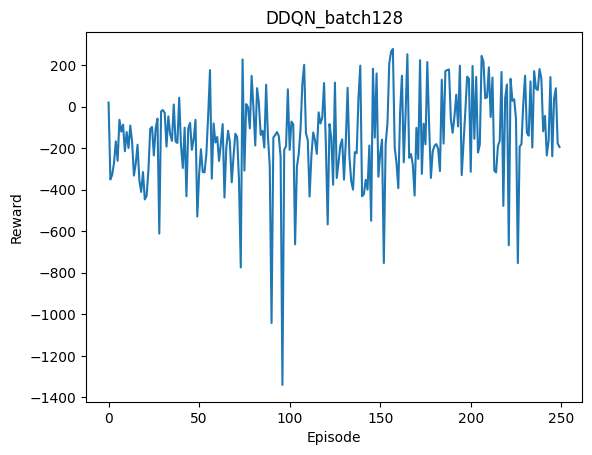

0

In [45]:
agent = DDQNAgent(state_size, action_size, batch_size=BATCH_SIZE)
crs = np.zeros(n_episodes)
crs_recent = deque(maxlen=25)

for i_episode in range(1, n_episodes+1):
    env = RecordVideo(gym.make("LunarLander-v2", render_mode="rgb_array"), f"./DDQN/batch{BATCH_SIZE}/eps{i_episode}") if i_episode % 50 == 0 else gym.make("LunarLander-v2", render_mode="rgb_array")
    state, info = env.reset()
    done = False
    cr = 0
    action_count = 0
    while not done:
        action = agent.take_action(state, eps)
        next_state, reward, done, truncated, info = env.step(action)
        agent.experience_buffer.store_trans(state, action, next_state, reward, done or truncated)
        # TODO: update agent
        agent.update_params()
        # TODO: update current state and episode cummulative rewards
        state = next_state
        cr += reward
        action_count += 1
        if action_count % 5 == 0:
            agent.update_target_network()

    # TODO: decay epsilon
    eps = max(eps * eps_decay_rate, eps_end)

    # TODO: update current cummulative rewards and recent cummulative rewards
    crs[i_episode - 1] = cr
    crs_recent.append(cr)

    # TODO: save agent every 50 episodes
    if i_episode % 50 == 0:
        agent.save(f"q_net_batch{BATCH_SIZE}_eps{i_episode}.pt")

    print(f'\rEpisode {i_episode}\tAverage Reward: {np.mean(crs_recent):.2f}\tEpsilon: {eps:.2f}', end="")
    if i_episode % 25 == 0:
        print(f'\rEpisode {i_episode}\tAverage Reward: {np.mean(crs_recent):.2f}\tEpsilon: {eps:.2f}')

fig = plt.figure()
plt.plot(np.arange(len(crs)), crs)
plt.ylabel('Reward')
plt.xlabel('Episode')
plt.title(f"DDQN_batch{BATCH_SIZE}")
plt.savefig(f"DDQN_batch{BATCH_SIZE}.pdf")
plt.show()
os.system("zip -r DDQN128.zip DDQN/")


In [46]:
!zip -r /content/ddqnbatch128 /content/DDQN/batch128

  adding: content/DDQN/batch128/ (stored 0%)
  adding: content/DDQN/batch128/eps250/ (stored 0%)
  adding: content/DDQN/batch128/eps250/rl-video-episode-0.meta.json (deflated 13%)
  adding: content/DDQN/batch128/eps250/rl-video-episode-0.mp4 (deflated 10%)
  adding: content/DDQN/batch128/eps150/ (stored 0%)
  adding: content/DDQN/batch128/eps150/rl-video-episode-0.meta.json (deflated 13%)
  adding: content/DDQN/batch128/eps150/rl-video-episode-0.mp4 (deflated 7%)
  adding: content/DDQN/batch128/eps200/ (stored 0%)
  adding: content/DDQN/batch128/eps200/rl-video-episode-0.meta.json (deflated 13%)
  adding: content/DDQN/batch128/eps200/rl-video-episode-0.mp4 (deflated 11%)
  adding: content/DDQN/batch128/eps50/ (stored 0%)
  adding: content/DDQN/batch128/eps50/rl-video-episode-0.meta.json (deflated 13%)
  adding: content/DDQN/batch128/eps50/rl-video-episode-0.mp4 (deflated 10%)
  adding: content/DDQN/batch128/eps100/ (stored 0%)
  adding: content/DDQN/batch128/eps100/rl-video-episode-0.m